<IPython.core.display.Javascript object>


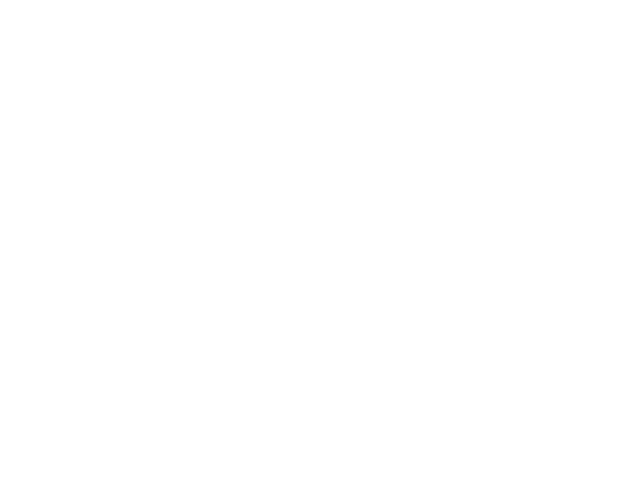

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math as mt

%matplotlib notebook

def objfun(x):
    f=np.cos(1/x)/x
    return f

t=np.linspace(-1,1,1000)
ft=objfun(t)
plt.plot(t,ft)


Sample simple Genetic Algorithm

Generation:  0  maximum fitness = 262.98172978758174  at  0.007991535364599844
Generation:  1  maximum fitness = 4201.594139606822  at  0.0029866210610058896
Generation:  2  maximum fitness = 11267.108804455263  at  0.00017900305467100091
Generation:  3  maximum fitness = 12409.693751465747  at  0.00017900305486628952
Generation:  4  maximum fitness = 42799.86508707408  at  7.982092595293366e-05
Generation:  5  maximum fitness = 94334.06154124436  at  1.1172094922740072e-05
Generation:  6  maximum fitness = 104159.31644237535  at  7.917831338394472e-05
Generation:  7  maximum fitness = 282005.13988617517  at  1.8143620973964936e-05
Generation:  8  maximum fitness = 723282.256388072  at  0.0625111852461715
Generation:  9  maximum fitness = 723282.256388072  at  2.4522749605300487e-05
Generation:  10  maximum fitness = 778325.9574218049  at  1.1089756377869017e-05
Generation:  11  maximum fitness = 778517.8552296794  at  1.255375876148268e-06
Generation:  12  maximum fitness = 2098346.11

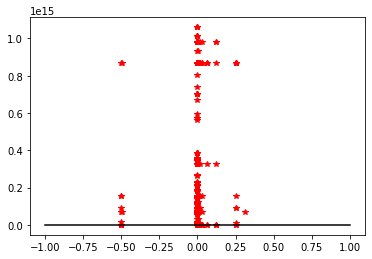

In [2]:
n=1000 #population
parents=np.random.rand(n)
ngen=50 #number of generations
ngene=64 #coding dependent - we're in a 64-bit world
gen=0
pmut=0.01 #bit-wise/gene-wise mutation rate

while gen<ngen:
    
    fit=objfun(parents)
    i=1
    children=np.array([])
    #children=np.append(children,parents[np.argmax(fit)]) 

    
    for i in range(0,n): # make n children, parents are polyganous and reproduction is asexual
        
        #this is the full GA, for a single generation
        
        #first, breed
        fit=abs(fit*(fit>0)) #objective function fitness must be non-negative
        pdf=fit/np.sum(fit)  #probability of each being the parent
        (mum,dad)=np.random.choice(n,2,p=pdf)  #choose mum and dad
        ggene=np.random.randint(0,ngene)    #choose crossover
        shift=2**ggene 
        kid= ( mt.floor(parents[mum]*shift) + (parents[dad]*shift)%1 ) #mum+dad
        
        #then mutate (a bit trickier - but essentially just corrupting bits with probability p):
        kid= mt.floor(kid* (2**(ngene-ggene))) #big kid (long-int)
        imut= int(np.sum(2**np.argwhere((np.random.rand(ngene)<pmut))))
        kid= kid^imut # mutation
        kid=kid/(2**ngene) 
        
        #add the new kid to the list of children
        children=np.append(children,kid)
        

        
    parents=children
    #report 
    print("Generation: ",gen," maximum fitness =",max(fit),' at ',parents[np.argmax(fit)])

    #and repeat
    gen+=1
    
plt.figure()    
plt.plot(parents,fit,'r*')
plt.plot(t,ft,'k')
plt.show()

Now, try it yourself with a 2D function - this is the "Eggholder" function (according to wikipedia, and it is notoriously bumpy. Try to MINIMISe it.

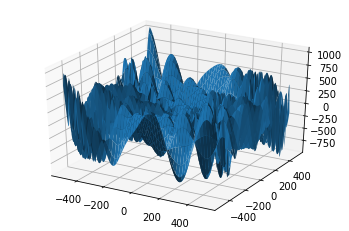

In [3]:
from mpl_toolkits.mplot3d import Axes3D # This import has side effects required for the kwarg projection='3d' in the call to fig.add_subplot

def objfun2d(x,y):
    f=-(y+47)*np.sin(np.sqrt(np.abs(x/2+y+47)))-x*np.sin(np.sqrt(np.abs(x-y-47)))
    return f

fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
x = y = np.arange(-512, 512, 1)
X, Y = np.meshgrid(x, y)
zs = np.array([objfun2d(x,y) for x,y in zip(np.ravel(X), np.ravel(Y))])
Z = zs.reshape(X.shape)

ax.plot_surface(X, Y, Z)